In [93]:
import numpy as np
from AV_Aimsun_parameters import *
import matplotlib.pyplot as plt
from numpy import histogram
import seaborn as sns

In [94]:
data_dir = "..\Aimsun\TwoLaneOneWay\AV-penetration"

In [95]:
assertive_file_names = []
for file in os.listdir(os.path.join(data_dir, "Assertive")):
    file_name = os.path.splitext(file)[0]
    assertive_file_names.append(file_name)

cautious_file_names = []
for file in os.listdir(os.path.join(data_dir, "Cautious")):
    file_name = os.path.splitext(file)[0]
    cautious_file_names.append(file_name)

In [97]:
class AV_analysis(AimsunData):
    """ 
    Initialise a connection to the AV analysis SQLITE files.
    """
    def __init__(self, filename1, folder_name):
        super().__init__(filename1, folder_name)
        
        try:
            self.c1
        except AttributeError:
            self.getconnection(filename1, folder_name)
    
    def AV_params(self):
        Aimsun_dict = self.Aggregated_Aimsun_values(self.c1)          # Has to be made available when changed in Aimsun_parameters.py
        len(Aimsun_dict)
        return Aimsun_dict


In [98]:
print("Processing assertive data...")
Assertive_data_dict = {}

for filename in assertive_file_names:
    DB_data = AV_analysis(filename + ".sqlite", folder_name = "AV-penetration\Assertive")
    print("count 1")
    Assertive_data_dict[filename] = DB_data.AV_params()

print("Processing cautious data...")
Cautious_data_dict = {}

for filename in cautious_file_names:
    DB_data = AV_analysis(filename + ".sqlite", folder_name = "AV-penetration\Cautious")
    print("count 2")
    Cautious_data_dict[filename] = DB_data.AV_params()

print("Done.")

Processing assertive data...
count 1
count 1
count 1
count 1
count 1
Processing cautious data...
count 2
count 2
count 2
count 2
count 2
Done.


In [73]:
def BinSize(p, POI, bins:int=20, epsilon:float=1e-10):
    """ Calculate histogram bounds and bins"""
    if POI == 'TTC':
        lb = 0
        ub = 199
    elif POI == 'DRAC':
        lb = 0
        ub = 0.17
    else:
        lb = min(p)
        ub = max(p)
        if POI == 'Truck_speed': # Unrealisttic speed values removed
            ub = 95
    
    # make sure that the size would match.
    binsave = bins
    if POI == 'Density':
        bins = 10
    else:
        bins = binsave

    return bins, lb, ub

In [ ]:
POIs = ['TTC', 'DRAC', 'Truck_speed', 'Car_speed', 'Density']

[1.6595959595959602, 11.438201183431953, 4.865743190661479, 14.446840148698875, 99.9299093655597, 5.274638633377136, 9.1888006686168, 3.087398995413846, 12.234133091896789, 2.2493531384762826, 6.65219903691814, 71.60778210116726, 1.2158154859967047, 1.0955712562467668, 16.68517520215636, 21.75887487875849, 0.9632107023411367, 1.549649789873924, 19.38531187122735, 12.666464339908948, 6.616762600028076, 61.76146788990828, 20.626287644244293, 12.064420331239289, 11.643495145631071, 5.783749534103615, 30.6242925555072, 14.241758241758218, 44.86368932038837, 49.576624685138526, 11.946902654867259, 2.6171052631578933, 32.578236204228986, 22.4322409211692, 17.33844781445138, 6.749013466958976, 11.999194089993287, 0.6138926722963762, 38.00968229954616, 3.0260179799048146, 22.355801104972375, 16.22614525139665, 39.61284185493454, 28.643348528802324, 39.56745027124773, 14.913838120104455, 58.36000000000001, 4.773491379310347, 16.747972341618393, 6.328645447816434, 38.83715846994536, 22.753804834

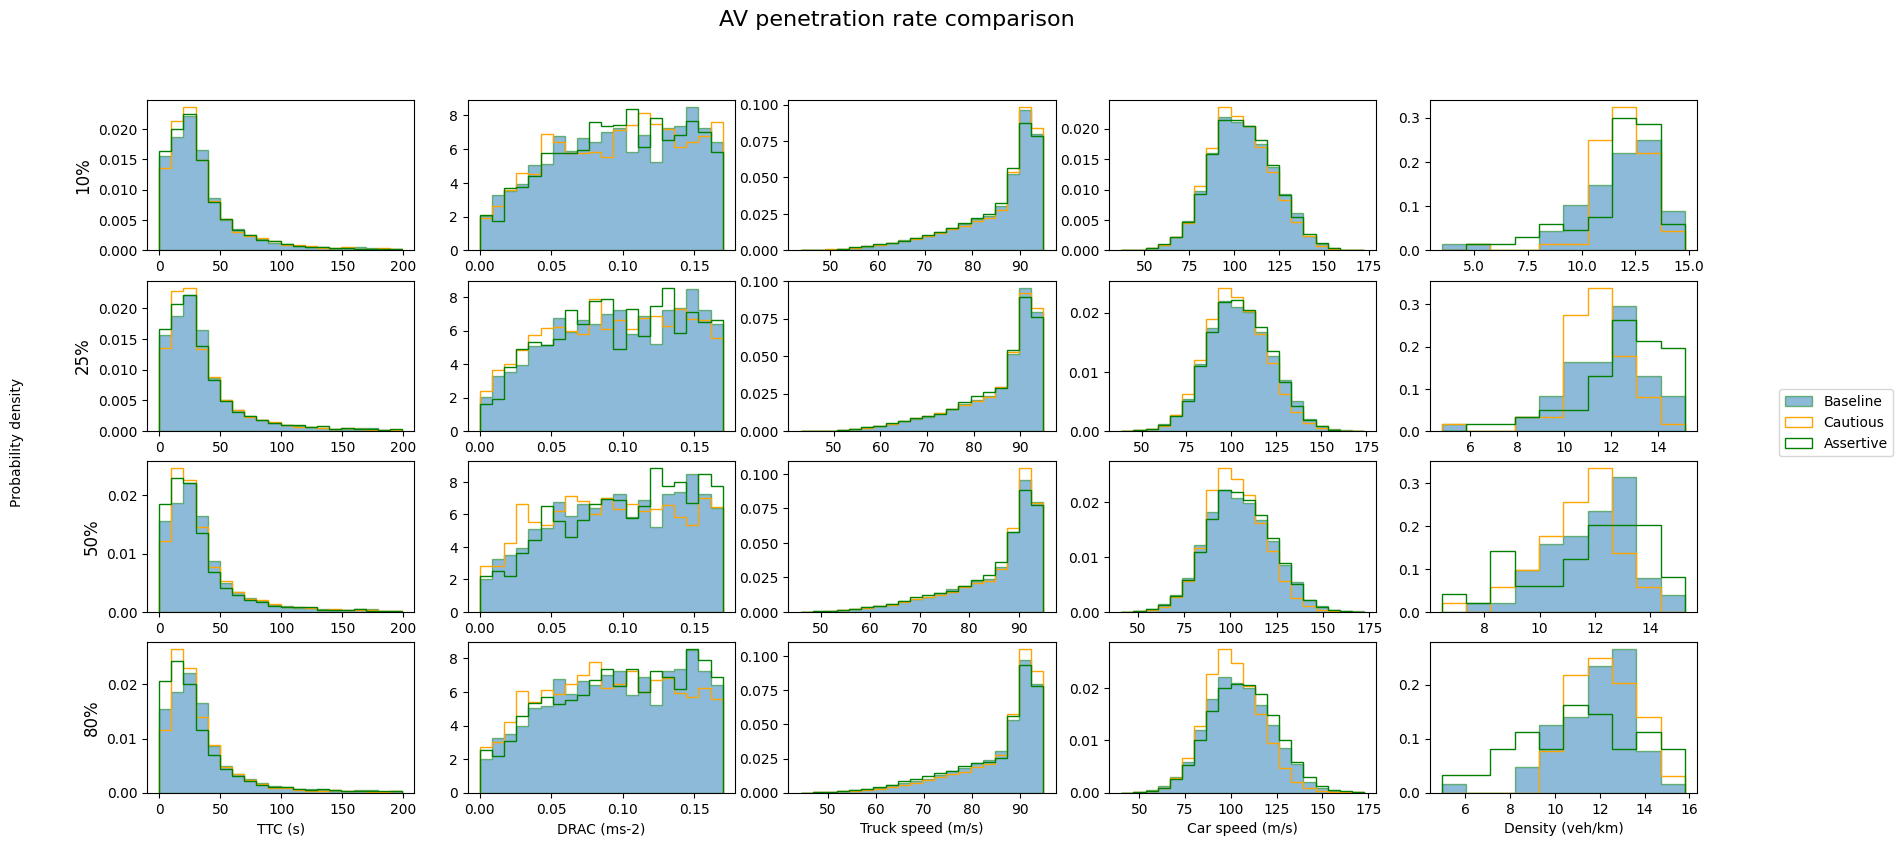

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(20, 9))
xlabels = ["TTC (s)", "DRAC (ms-2)", "Truck speed (m/s)", "Car speed (m/s)", "Density (veh/km)"] # CHECK UNITS
penRates = ["10%", "25%", "50%", "80%"]

for i in range(len(assertive_file_names)-1):
    for j, POI in enumerate(POIs):
        bins, lb, ub = BinSize(Assertive_data_dict[assertive_file_names[i]][POI], POI)
        kwargs1 = dict(histtype='step', alpha=1, density=True, ec="orange", bins=bins, range=[lb, ub], color = "orange", label = "Cautious")
        kwargs2 = dict(histtype='step', alpha=1, density=True, ec="green", bins=bins, range=[lb, ub], color = "green", label = "Assertive")
        kwargs3 = dict(histtype='stepfilled', alpha=0.5, density=True, ec="green", bins=bins, range=[lb, ub], label = "Baseline")

        axs[i, j].hist(Assertive_data_dict[assertive_file_names[0]][POI], **kwargs3)
        axs[i, j].hist(Cautious_data_dict[cautious_file_names[i+1]][POI], **kwargs1)
        axs[i, j].hist(Assertive_data_dict[assertive_file_names[i+1]][POI], **kwargs2)
        axs[i, j].xlabel = xlabels[j]
        axs[i, j].ylabel = "Density"

# Make single legend for all subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='right')

# Make single y label for all subplots
fig.text(0.06, 0.5, 'Probability density', ha='center', va='center', rotation='vertical')

# Make x labels for all subplots
for ax, xlabel in zip(axs[-1, :], xlabels):
    ax.set_xlabel(xlabel)

# Set penetration rates as labels on the right side of the plot
for ax, penRate in zip(axs[:, 0], penRates):
    ax.set_ylabel(penRate, rotation=90, size='large')

# Set title
fig.suptitle("AV penetration rate comparison", fontsize=16)

plt.show()

In [115]:
def BinSize(p, POI, bins=20, epsilon=1e-10):
    """Calculate histogram bounds and bins for density plots"""
    if POI == 'TTC':
        lb = 0
        ub = 199
    elif POI == 'DRAC':
        lb = 0
        ub = 2
    else:
        lb = min(p)
        ub = max(p)
        if POI == 'Truck_speed': # Unrealistic speed values removed
            ub = 95

    # Make sure that the size matches.
    binsave = bins
    if POI == 'Density':
        bins = 10
    else:
        bins = binsave

    return np.linspace(lb, ub, bins + 1)

<Figure size 640x480 with 0 Axes>

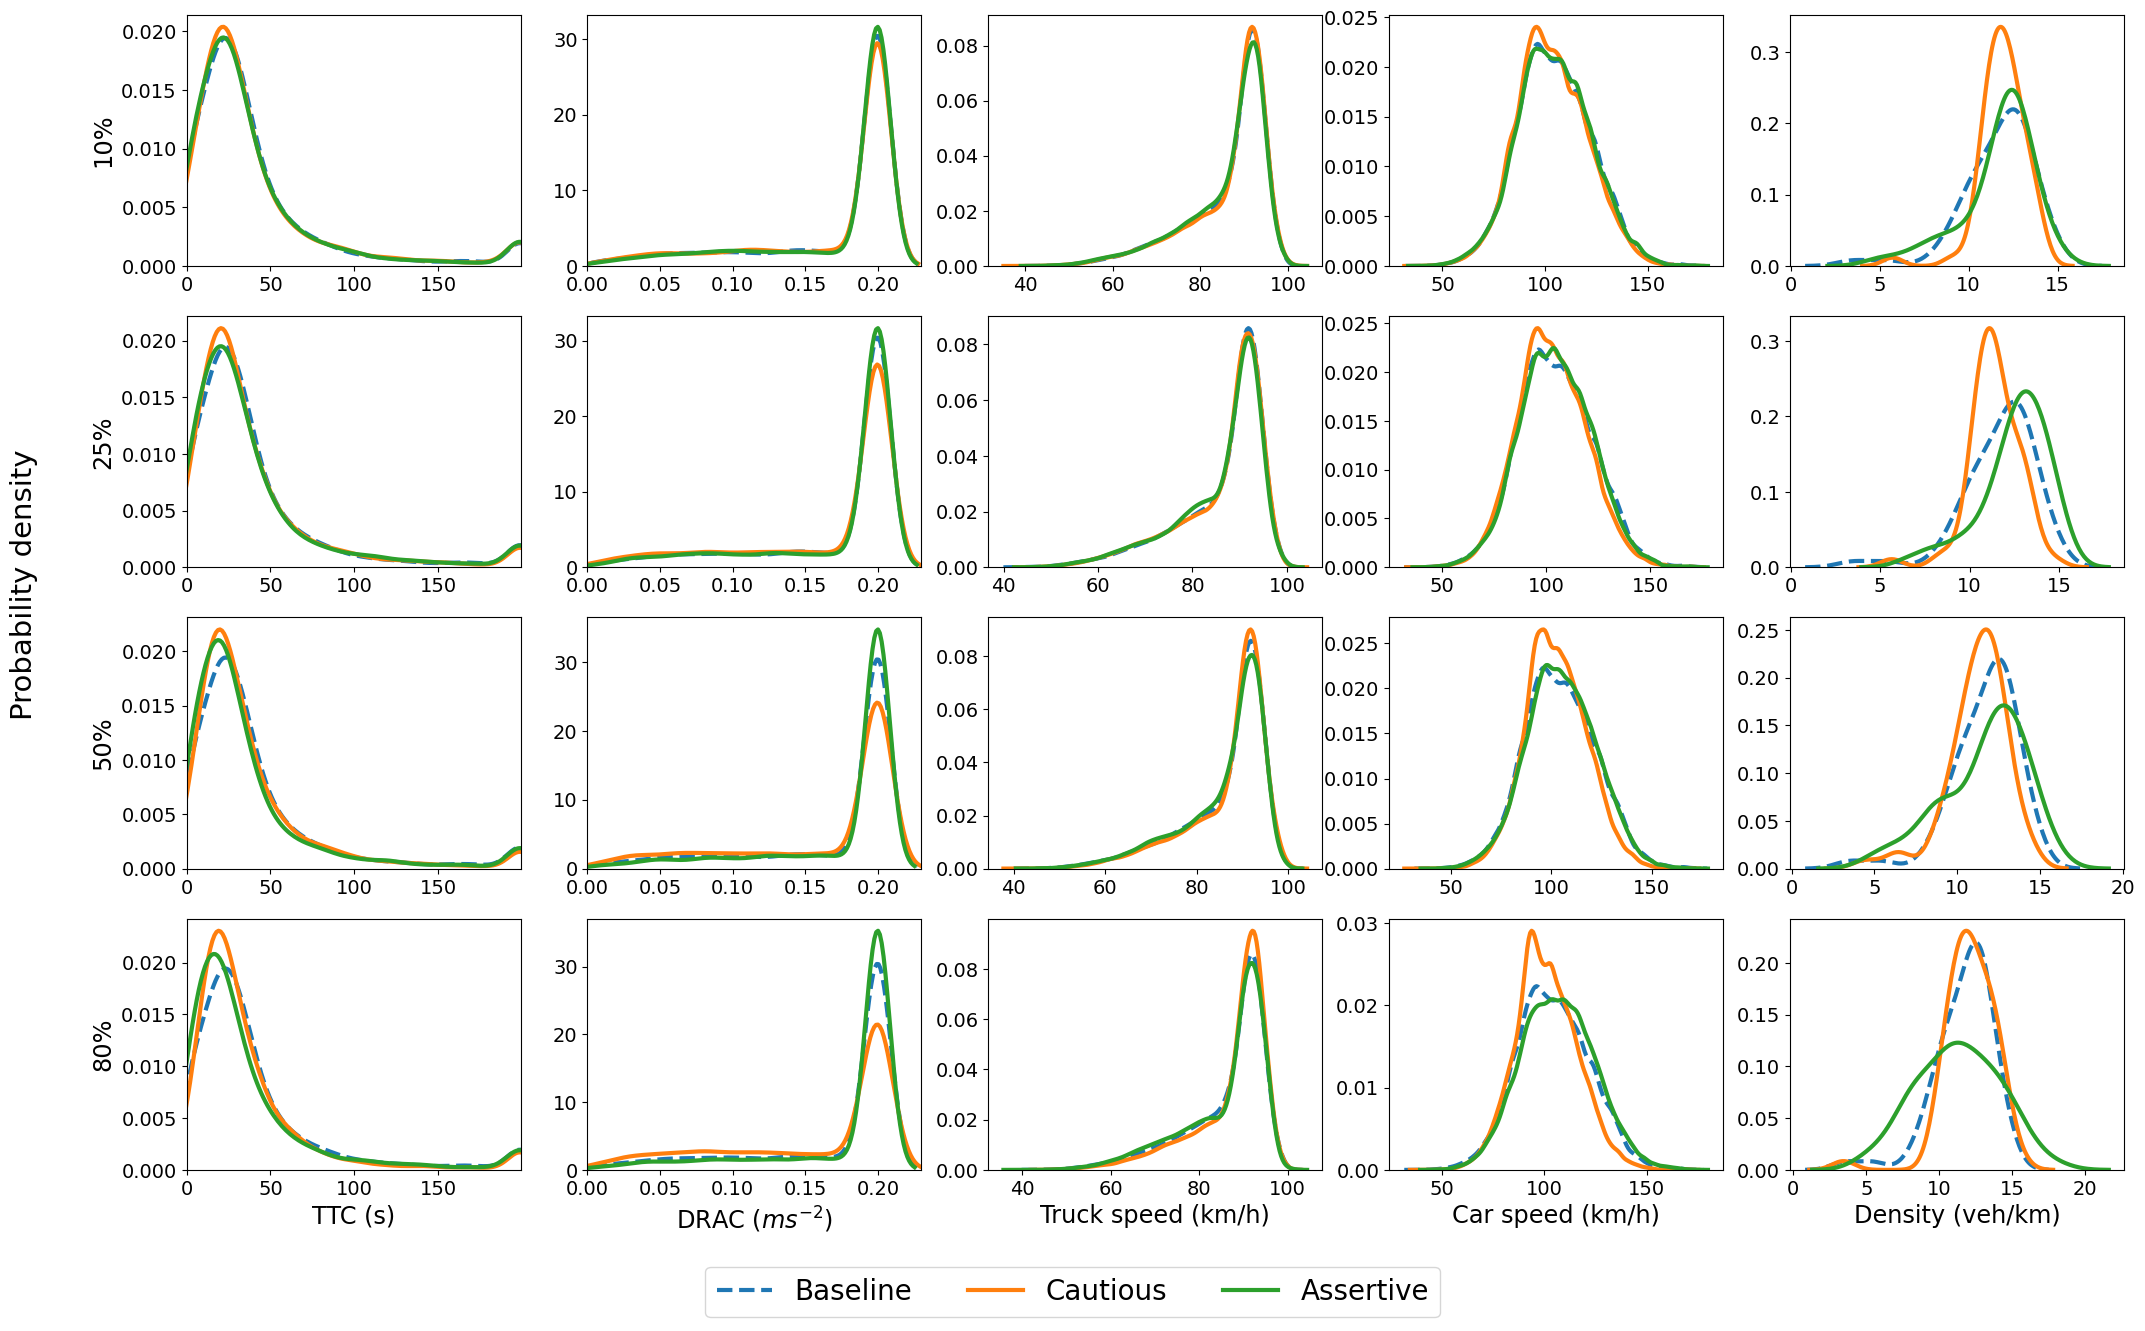

In [118]:
plt.clf()
fig, axs = plt.subplots(4, 5, figsize=(25, 15))
xlabels = ["TTC (s)", "DRAC ($ms^{-2}$)", "Truck speed (km/h)", "Car speed (km/h)", "Density (veh/km)"]
penRates = ["10%", "25%", "50%", "80%"]

Assertive_data_dict[assertive_file_names[0]]['TTC'] = np.array(Assertive_data_dict[assertive_file_names[0]]['TTC']).clip(0, 199)
Assertive_data_dict[assertive_file_names[0]]['DRAC'] = np.array(Assertive_data_dict[assertive_file_names[0]]['DRAC']).clip(0, 0.23)
Cautious_data_dict[cautious_file_names[0]]['TTC'] = np.array(Cautious_data_dict[cautious_file_names[0]]['TTC']).clip(0, 199)
Cautious_data_dict[cautious_file_names[0]]['DRAC'] = np.array(Cautious_data_dict[cautious_file_names[0]]['DRAC']).clip(0, 0.23)

for i in range(len(assertive_file_names)-1):   
    # Clip TTC and DRAC data to 0-199s and 0-0.17ms-2, respectively
    Assertive_data_dict[assertive_file_names[i+1]]['TTC'] = np.array(Assertive_data_dict[assertive_file_names[i+1]]['TTC']).clip(0, 199)
    Assertive_data_dict[assertive_file_names[i+1]]['DRAC'] = np.array(Assertive_data_dict[assertive_file_names[i+1]]['DRAC']).clip(0, 0.23)
    Cautious_data_dict[cautious_file_names[i+1]]['TTC'] = np.array(Cautious_data_dict[cautious_file_names[i+1]]['TTC']).clip(0, 199)
    Cautious_data_dict[cautious_file_names[i+1]]['DRAC'] = np.array(Cautious_data_dict[cautious_file_names[i+1]]['DRAC']).clip(0, 0.23)


    for j, POI in enumerate(POIs):        
        bins = BinSize(Assertive_data_dict[assertive_file_names[i]][POI], POI)

        sns.kdeplot(data=Assertive_data_dict[assertive_file_names[0]][POI], label="Baseline", ax=axs[i, j], linewidth=3, linestyle=('dashed'))
        sns.kdeplot(data=Cautious_data_dict[cautious_file_names[i+1]][POI], label="Cautious", ax=axs[i, j], linewidth=3)
        sns.kdeplot(data=Assertive_data_dict[assertive_file_names[i+1]][POI], label="Assertive", ax=axs[i, j], linewidth=3)
    
        # Clip TTC and DRAC data to 0-199s and 0-0.17ms-2, respectively
        if(POI == 'TTC'):
            axs[i, j].set_xlim(0, 199)
        elif POI == 'DRAC':
            axs[i, j].set_xlim(0, 0.23)

        axs[i, j].tick_params(labelsize=14)
        axs[i, j].set_ylabel('')

# Make single legend for all subplots
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', fontsize=20, ncol=3)

# Make single y label for all subplots
fig.text(0.06, 0.5, 'Probability density', ha='center', va='center', rotation='vertical', fontsize=21)

# Make x labels for all subplots
for ax, xlabel in zip(axs[-1, :], xlabels):
    ax.set_xlabel(xlabel, size='xx-large')

# Set penetration rates as labels on the right side of the plot
for ax, penRate in zip(axs[:, 0], penRates):
    ax.set_ylabel(penRate, rotation=90, size='xx-large')

plt.show()
